In [269]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import scipy.stats as st

In [271]:
# importing dataset 1
House_prices ='Resources/MSPUS.csv'
# House_prices = "../Resources/MSPUS.csv"
House_prices_df = pd.read_csv(House_prices)
House_prices_df.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [273]:
# cleaning dataset 1
House_prices_df=House_prices_df.rename(columns={'MSPUS': 'Price'})
House_prices_df.head(20)

,DATE,Price
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
5,1964-04-01,18900.0
6,1964-07-01,18900.0
7,1964-10-01,19400.0
8,1965-01-01,20200.0
9,1965-04-01,19800.0


In [275]:
#adjusting types
House_prices_df.dtypes

DATE      object
Price    float64
dtype: object

In [277]:
# more cleaning
House_prices_df ["DATE"] = pd. to_datetime (House_prices_df ["DATE"])
House_prices_df ["Year"] = House_prices_df["DATE"].dt.year
House_prices_df.head()

,DATE,Price,Year
0,1963-01-01,17800.0,1963
1,1963-04-01,18000.0,1963
2,1963-07-01,17900.0,1963
3,1963-10-01,18500.0,1963
4,1964-01-01,18500.0,1964


In [279]:
average_price_by_year = House_prices_df.groupby ("Year") ["Price" ].mean().reset_index()
average_price_by_year 

,Year,Price
0,1963,18050.0
1,1964,18925.0
2,1965,20125.0
3,1966,21500.0
4,1967,22750.0
...,...,...
57,2020,328150.0
58,2021,383000.0
59,2022,432950.0
60,2023,426525.0


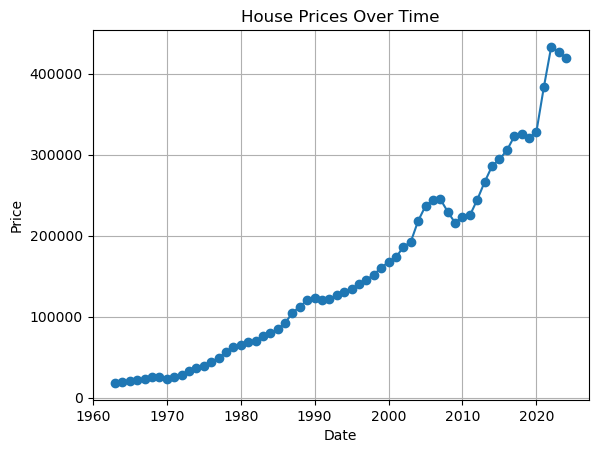

In [308]:
# plotting dataset 1
plt.plot(average_price_by_year['Year'], average_price_by_year['Price'], marker='o')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("House Prices Over Time")
plt.grid(True)
plt.savefig('House Prices Over Time')
plt.show()

In [283]:
#importing dataset 2
Houses_sold = 'Resources/number_houses_sold.csv'
HS_df = pd.read_csv(Houses_sold)
HS_df.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560,87.0,134.0,199.0,141.0
1,1964.0,565,90.0,146.0,200.0,129.0
2,1965.0,575,94.0,142.0,210.0,129.0
3,1966.0,461,84.0,113.0,166.0,99.0
4,1967.0,487,77.0,112.0,179.0,119.0


In [285]:
#Cleaning the dataset 2
HS_df['Total by Regions'] = HS_df[['Northeast', 'MidWest', 'South', 'West']].sum(axis=1)
HS_df = HS_df.dropna(subset=['Year'])
HS_df['Year'] = HS_df['Year'].astype(int)
print("Cleaned Data:")
print(HS_df[['Year', 'Total by Regions']].head())

Cleaned Data:
   Year  Total by Regions
0  1963             561.0
1  1964             565.0
2  1965             575.0
3  1966             462.0
4  1967             487.0


In [287]:
HS_df = HS_df.groupby('Year')['Total by Regions'].mean().reset_index()

HS_df.columns = ['Year', 'Average Total by Year (Thousands)']


print("Average Total by Year DataFrame:")
print(HS_df)

Average Total by Year DataFrame:
    Year  Average Total by Year (Thousands)
0   1963                              561.0
1   1964                              565.0
2   1965                              575.0
3   1966                              462.0
4   1967                              487.0
..   ...                                ...
56  2019                              683.0
57  2020                              822.0
58  2021                              771.0
59  2022                              641.0
60  2023                              668.0

[61 rows x 2 columns]


In [289]:
Clean_HS_df = HS_df[['Year', 'Average Total by Year (Thousands)']]
Clean_HS_df.head()

,Year,Average Total by Year (Thousands)
0,1963,561.0
1,1964,565.0
2,1965,575.0
3,1966,462.0
4,1967,487.0


In [291]:
# Statistics for DS 2
print("statistics for Totals:")
Clean_HS_df['Average Total by Year (Thousands)'].describe()

statistics for Totals:


count      61.000000
mean      655.131148
std       201.924613
min       306.000000
25%       509.000000
50%       641.000000
75%       757.000000
max      1282.000000
Name: Average Total by Year (Thousands), dtype: float64

In [293]:
#statistics for DS 1
average_price_by_year['Price'].describe()

count        62.000000
mean     156123.790323
std      116577.348156
min       18050.000000
25%       57575.000000
50%      128462.500000
75%      234800.000000
max      432950.000000
Name: Price, dtype: float64

In [295]:
#merging datasets
merge_df = pd.merge(average_price_by_year, Clean_HS_df, on='Year')
merge_df

,Year,Price,Average Total by Year (Thousands)
0,1963,18050.0,561.0
1,1964,18925.0,565.0
2,1965,20125.0,575.0
3,1966,21500.0,462.0
4,1967,22750.0,487.0
...,...,...,...
56,2019,320250.0,683.0
57,2020,328150.0,822.0
58,2021,383000.0,771.0
59,2022,432950.0,641.0


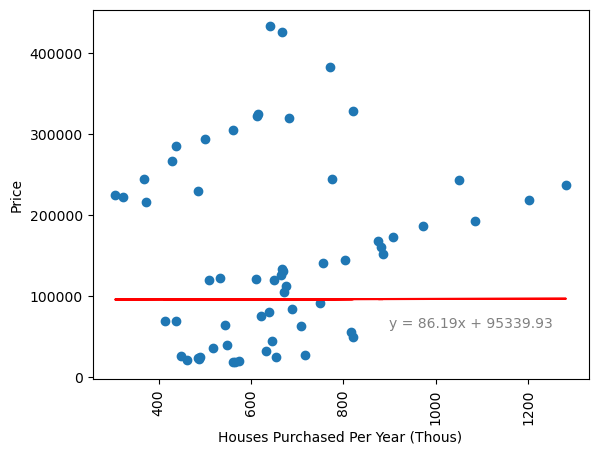

The correlation between both factors is 0.15


In [301]:
#Setting X and Y axis
Price = merge_df['Price']
purchased = merge_df['Average Total by Year (Thousands)']

#Linear Regression of Income and Homes purchased 
(slope, intercept, rvalue, pvalue, stderr) = linregress(purchased, Price)
regress = purchased + slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Scatter plot and linear regression plot
plt.scatter(purchased, Price) 
plt.plot(purchased, regress, 'r-')
plt.annotate(line_eq,(900, 61000), color = 'gray')
plt.xticks(rotation = 'vertical')
plt.xlabel('Houses Purchased Per Year (Thous)')
plt.ylabel('Price')
plt.savefig('Price_regression')
plt.show()

#Peasrson correlation
correlation = st.pearsonr(Price, purchased)
print(f'The correlation between both factors is {round(correlation[0],2)}')